<a href="https://colab.research.google.com/github/WhiteJaeger/googleColab/blob/master/HMM_%26_CRF%2C_9_6_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hidden Markov Models

(Bad) Reminder:
Hidden Markov Model (HMM) is a statistical Markov model in which the system being modeled is assumed to be a Markov process with unobservable ("hidden") states. HMM assumes that there is another process Y whose behavior "depends" on X. 

The goal is to learn about X by observing Y.

(Better) Reminder: The probability of being in some state STATE depends only on the previous state, and not on what happened before.


## Main Probelms

* Given the model parameters and observed data, estimate the optimal sequence of hidden states.
* Given the model parameters and observed data, calculate the model likelihood.
* Given just the observed data, estimate the model parameters.

The first and the second problem can be solved by the dynamic programming algorithms known as the Viterbi algorithm and the Forward-Backward algorithm, respectively. The last one can be solved by an iterative Expectation-Maximization (EM) algorithm, known as the Baum-Welch algorithm.

## Yet Another Example

![alt text](https://shorturl.at/ftyK2)

Transition prob.:
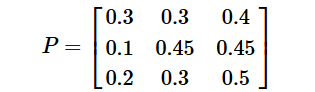

Emission prob.:
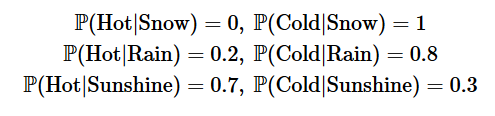

## Finding the Truth: Viterby

We are given a sequence of observations o₁,…,oₜ . For each state i and t=1,…,T, we define
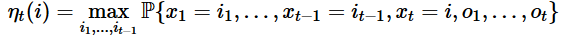

That is, the maximum probability of a path which ends at time t at the state i, given our observations.

## Code Snippets & Examples

https://hmmlearn.readthedocs.io/

In [1]:
pip install hmmlearn

     |████████████████████████████████| 368kB 4.5MB/s 


In [0]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt

from hmmlearn import hmm

In [0]:
model = hmm.GaussianHMM(n_components=3, covariance_type="full")
model.startprob_ = np.array([0.6, 0.3, 0.1]) # Начальные вероятности дл каждого из states.

model.transmat_ = np.array([[0.3, 0.3, 0.4], # Вероятности перехода из одного состояния в другое
                            [0.1, 0.45, 0.45],
                            [0.2, 0.3, 0.5]])

model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]]) # 
model.covars_ = np.tile(np.identity(2), (3, 1, 1)) # Ковариация между состояниями - как они "меняются" вместе.

X, Z = model.sample(150) # Генерация нескольких пробных проходов

In [19]:
remodel = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=100)
remodel.fit(X) # можно выучить все те же параметры из уже ранее созданных проходов

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=3, n_iter=100, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

In [20]:
remodel.means_

array([[ 2.91991075, -3.0043929 ],
       [ 4.84609377, 10.1357892 ],
       [-0.10156381, -0.17920073]])

In [21]:
remodel.transmat_

array([[0.44167518, 0.45181598, 0.10650884],
       [0.31063979, 0.52702703, 0.16233318],
       [0.16541655, 0.45595764, 0.37862581]])

In [23]:
remodel.get_params()

{'algorithm': 'viterbi',
 'covariance_type': 'full',
 'covars_prior': 0.01,
 'covars_weight': 1,
 'init_params': 'stmc',
 'means_prior': 0,
 'means_weight': 0,
 'min_covar': 0.001,
 'n_components': 3,
 'n_iter': 100,
 'params': 'stmc',
 'random_state': None,
 'startprob_prior': 1.0,
 'tol': 0.01,
 'transmat_prior': 1.0,
 'verbose': False}

In [41]:
hiddenStates2 = remodel.predict(X) # Предсказание наиболее вероятного состояния для каждого прохода
hiddenStates2

array([1, 1, 0, 1, 2, 0, 0, 1, 2, 2, 1, 2, 0, 1, 1, 0, 1, 1, 0, 0, 1, 2,
       0, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 0, 2, 1, 1, 0, 2, 2, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 0,
       1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 0, 0, 0, 0,
       1, 2, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 0, 2, 2, 2, 0, 1, 0, 2, 0, 0, 1, 2,
       2, 1, 0, 2, 0, 1, 2, 1, 2, 1, 0, 0, 1, 0, 1, 2, 2, 0, 0, 1, 2, 2,
       0, 0, 1, 1, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 0,
       2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 2, 1, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1,

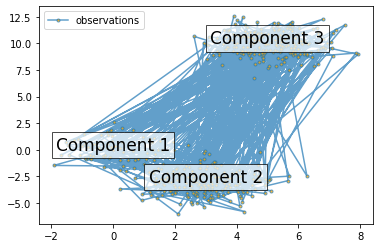

In [42]:
# Generate samples
X, Z = model.sample(500)

# Plot the sampled data
plt.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)

# Indicate the component numbers
for i, m in enumerate(model.means_):
    plt.text(m[0], m[1], 'Component %i' % (i + 1),
             size=17, horizontalalignment='center',
             bbox=dict(alpha=.7, facecolor='w'))
plt.legend(loc='best')
plt.show()

In [0]:
startprob = np.array([0.6, 0.3, 0.1, 0.0])
# The transition matrix, note that there are no transitions possible
# between component 1 and 3
transmat = np.array([[0.7, 0.2, 0.0, 0.1],
                     [0.3, 0.5, 0.2, 0.0],
                     [0.0, 0.3, 0.5, 0.2],
                     [0.2, 0.0, 0.2, 0.6]])
# The means of each component
means = np.array([[0.0,  0.0],
                  [0.0, 11.0],
                  [9.0, 10.0],
                  [11.0, -1.0]])
# # The covariance of each component
covars = .5 * np.tile(np.identity(2), (4, 1, 1))

# Build an HMM instance and set parameters
model = hmm.GaussianHMM(n_components=4, covariance_type="full")

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
model.startprob_ = startprob
model.transmat_ = transmat
model.means_ = means
model.covars_ = covars

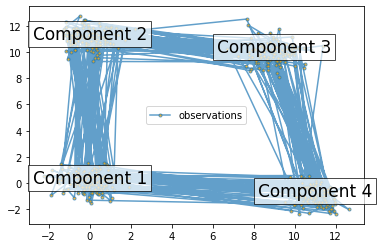

In [44]:
# Generate samples
X, Z = model.sample(500)

# Plot the sampled data
plt.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)

# Indicate the component numbers
for i, m in enumerate(means):
    plt.text(m[0], m[1], 'Component %i' % (i + 1),
             size=17, horizontalalignment='center',
             bbox=dict(alpha=.7, facecolor='w'))
plt.legend(loc='best')
plt.show()

# Conditional Random Fields

Conditional random fields (CRFs) are a class of statistical modeling method often applied in pattern recognition and machine learning and used for structured prediction. Whereas a classifier predicts a label for a single sample without considering "neighboring" samples, a CRF can take context into account. 

To do so, the prediction is modeled as a graphical model, which implements dependencies between the predictions.

Application: NER, POS-tagging, Speech Recognition etc. - where contextual information or state of the neighbors affect the current prediction - sequences.

Hidden Markov Models are generative, and give output by modeling the joint probability distribution. On the other hand, Conditional Random Fields are discriminative, and model the conditional probability distribution. CRFs don’t rely on the independence assumption (that the labels are independent of each other), and avoid label bias. 

One way to look at it is that Hidden Markov Models are a very specific case of Conditional Random Fields, with constant transition probabilities used instead. HMMs are based on Naive Bayes, which we say can be derived from Logistic Regression, from which CRFs are derived.

#

#

#

#

![alt text](https://shorturl.at/bpFSW)

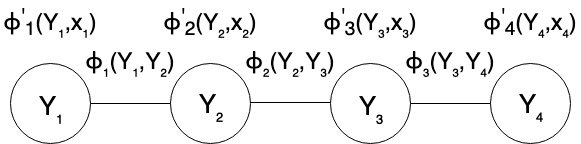

In CRFs, the input is a set of features (real numbers) derived from the input sequence using feature functions, the weights associated with the features (that are learned) and the previous label and the task is to predict the current label. 

The weights of different feature functions will be determined such that the likelihood of the labels in the training data will be maximised.
In CRF, a set of feature functions are defined to extract features for each word in a sentence. 

Some examples of feature functions are: is the first letter of the word capitalised, what the suffix and prefix of the word, what is the previous word, is it the first or the last word of the sentence, is it a number etc. These set of features are called State Features. 

In CRF, we also pass the label of the previous word and the label of the current word to learn the weights. CRF will try to determine the weights of different feature functions that will maximise the likelihood of the labels in the training data. The feature function dependent on the label of the previous word is Transition Feature.

## Code Snippets and Example

https://sklearn-crfsuite.readthedocs.io/en/latest/

POS-tagging

In [57]:
!pip install nltk

import nltk
import re
from sklearn.model_selection import train_test_split

nltk.download('treebank')

nltk.download('universal_tagset')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [51]:
tagged_sentence = nltk.corpus.treebank.tagged_sents(tagset='universal')
print("Number of Tagged Sentences ",len(tagged_sentence))
tagged_words=[tup for sent in tagged_sentence for tup in sent]
print("Total Number of Tagged words", len(tagged_words))
vocab=set([word for word,tag in tagged_words])
print("Vocabulary of the Corpus",len(vocab))
tags=set([tag for word,tag in tagged_words])
print("Number of Tags in the Corpus ",len(tags))

Number of Tagged Sentences  3914
Total Number of Tagged words 100676
Vocabulary of the Corpus 12408
Number of Tags in the Corpus  12


In [55]:
trainSet, testSet = train_test_split(tagged_sentence, test_size=0.2, random_state=1234)
print("Number of Sentences in Training Data ", len(trainSet))
print("Number of Sentences in Testing Data ", len(testSet))

Number of Sentences in Training Data  3131
Number of Sentences in Testing Data  783


In [0]:
def features(sentence, index):
    ### sentence is of the form [w1,w2,w3,..], index is the position of the word in the sentence
    return {
        'is_first_capital':int(sentence[index][0].isupper()),
        'is_first_word': int(index == 0),
        'is_last_word':int(index == len(sentence)-1),
        'is_complete_capital': int(sentence[index].upper() == sentence[index]),
        'prev_word':'' if index == 0 else sentence[index-1],
        'next_word':'' if index == len(sentence)-1 else sentence[index+1],
        'is_numeric':int(sentence[index].isdigit()),
        'is_alphanumeric': int(bool((re.match('^(?=.*[0-9]$)(?=.*[a-zA-Z])',sentence[index])))),
        'prefix_1':sentence[index][0],
        'prefix_2': sentence[index][:2],
        'prefix_3':sentence[index][:3],
        'prefix_4':sentence[index][:4],
        'suffix_1':sentence[index][-1],
        'suffix_2':sentence[index][-2:],
        'suffix_3':sentence[index][-3:],
        'suffix_4':sentence[index][-4:],
        'word_has_hyphen': 1 if '-' in sentence[index] else 0  
         }

def untag(sentence):
    return [word for word, tag in sentence]

def prepareData(tagged_sentences):
    X, y = [], []
    for sentences in tagged_sentences:
        X.append([features(untag(sentences), index) for index in range(len(sentences))])
        y.append([tag for word,tag in sentences])
    return X, y

trainX, trainY = prepareData(train_set)
testX, testY = prepareData(test_set)

In [59]:
!pip install sklearn_crfsuite

     |████████████████████████████████| 747kB 6.7MB/s 


In [65]:
from sklearn_crfsuite import CRF

crf = CRF(
    algorithm='lbfgs', # Gradient descent using the L-BFGS (Broyden–Fletcher–Goldfarb–Shanno) method
    c1=0.01, # Коэф. регуляризации
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True # Используем все возможные переходы, даже которых нет в изначальных данных
)

crf.fit(trainX, trainY)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


CRF(algorithm='lbfgs', all_possible_states=None, all_possible_transitions=True,
    averaging=None, c=None, c1=0.01, c2=0.1, calibration_candidates=None,
    calibration_eta=None, calibration_max_trials=None, calibration_rate=None,
    calibration_samples=None, delta=None, epsilon=None, error_sensitive=None,
    gamma=None, keep_tempfiles=None, linesearch=None, max_iterations=100,
    max_linesearch=None, min_freq=None, model_filename=None, num_memories=None,
    pa_type=None, period=None, trainer_cls=None, variance=None, verbose=False)

In [68]:
from sklearn_crfsuite import metrics
from sklearn_crfsuite import scorers

predictions = crf.predict(testX)
print("F1 score on Test Data: ")
print(metrics.flat_f1_score(testY, predictions, average='weighted', labels=crf.classes_))

predictionsTrain=crf.predict(trainX)
metrics.flat_f1_score(trainY, predictionsTrain, average='weighted', labels=crf.classes_)

print('\n')

print(metrics.flat_classification_report(
    testY, predictions, labels=crf.classes_, digits=3
))

F1 score on Test Data: 
0.9738471726864286


              precision    recall  f1-score   support

         ADP      0.979     0.985     0.982      1869
        NOUN      0.966     0.977     0.972      5606
        CONJ      0.994     0.994     0.994       480
        VERB      0.964     0.960     0.962      2722
         ADJ      0.911     0.874     0.892      1274
           .      1.000     1.000     1.000      2354
           X      1.000     0.997     0.998      1278
         NUM      0.991     0.993     0.992       671
         DET      0.994     0.995     0.994      1695
         ADV      0.927     0.909     0.918       585
        PRON      0.998     0.998     0.998       562
         PRT      0.979     0.982     0.980       614

    accuracy                          0.974     19710
   macro avg      0.975     0.972     0.974     19710
weighted avg      0.974     0.974     0.974     19710



In [69]:
from collections import Counter

def printTransitions(trans_features):
    for (label_from, label_to), weight in trans_features:
        print("%-6s -> %-7s %0.6f" % (label_from, label_to, weight))

print("Top likely transitions:")
printTransitions(Counter(crf.transition_features_).most_common(20))

print("\nTop unlikely transitions:")
printTransitions(Counter(crf.transition_features_).most_common()[-20:])

Top likely transitions:
ADJ    -> NOUN    4.114996
NOUN   -> NOUN    2.935448
NOUN   -> VERB    2.891987
VERB   -> PRT     2.519179
X      -> VERB    2.271558
ADP    -> NOUN    2.265833
NOUN   -> PRT     2.172849
PRON   -> VERB    2.117186
NUM    -> NOUN    2.059221
DET    -> NOUN    2.053832
ADV    -> VERB    1.994419
ADV    -> ADJ     1.957063
NOUN   -> ADP     1.838684
VERB   -> NOUN    1.763319
ADJ    -> ADJ     1.660578
NOUN   -> CONJ    1.591359
PRT    -> NOUN    1.398473
NOUN   -> .       1.381863
NOUN   -> ADV     1.380086
ADV    -> ADV     1.301282

Top unlikely transitions:
X      -> NOUN    -1.136906
CONJ   -> PRT     -1.140622
ADJ    -> DET     -1.146271
.      -> DET     -1.255028
ADJ    -> PRON    -1.266624
PRON   -> DET     -1.330807
DET    -> .       -1.336752
CONJ   -> .       -1.368327
ADP    -> PRT     -1.392629
X      -> NUM     -1.484666
DET    -> DET     -1.509759
PRT    -> PRT     -1.522135
PRT    -> NUM     -1.562026
DET    -> ADP     -1.969625
X      -> PRT    

In [70]:
def printStateFeatures(state_features):
    for (attr, label), weight in state_features:
        print("%0.6f %-8s %s" % (weight, label, attr))

print("Top positive:")
printStateFeatures(Counter(crf.state_features_).most_common(30))

print("\nTop negative:")
printStateFeatures(Counter(crf.state_features_).most_common()[-30:])

Top positive:
6.751359 VERB     prev_word:will
5.940819 VERB     prev_word:would
5.830558 X        prefix_1:*
5.644523 NOUN     suffix_4:rest
5.260228 ADV      suffix_2:ly
5.043121 NOUN     is_first_capital
5.018842 VERB     prev_word:could
4.870949 ADJ      suffix_3:ous
4.849822 VERB     prev_word:to
4.677684 VERB     suffix_4:will
4.386434 ADJ      next_word:appeal
4.350940 PRT      prev_word:how
4.329975 NOUN     suffix_4:pany
4.205028 ADJ      prefix_4:many
4.153643 PRT      prev_word:lock
4.151036 ADJ      word_has_hyphen
4.147576 PRT      prev_word:tune
4.137127 NOUN     next_word:Express
4.116688 NOUN     suffix_4:food
4.070659 VERB     suffix_2:ed
4.041752 NOUN     suffix_4:rter
4.041646 ADV      suffix_3:hen
3.977862 ADP      prefix_4:whet
3.933282 PRT      prev_word:later
3.926642 NOUN     next_word:Neuberger
3.864944 ADV      prev_word:jumping
3.852364 VERB     prev_word:tumultuous
3.851362 NOUN     next_word:Practical
3.839589 NOUN     next_word:Union
3.812345 NOUN     next